# **Logistic Regression**
1. Fundamentos de la Técnica
La Regresión Logística es una técnica de clasificación supervisada que modela la probabilidad de que una instancia pertenezca a una clase específica. Aunque su nombre contiene "regresión", en realidad es un clasificador lineal que utiliza la función sigmoide para producir probabilidades.

Se usa principalmente para clasificación binaria, aunque también puede extenderse a problemas multiclase.

2. Modelo Matemático

🔹 Conjunto de entrenamiento

Dado un conjunto de entrenamiento $\{(\mathbf{x}_i, y_i)\}_{i=1}^N$ con $\mathbf{x}_i \in \mathbb{R}^d$ y $y_i \in \{0,1\}$.

🔹 Imputación por media

$\tilde{x} = \frac{1}{N}\sum_{i=1}^{N} x_i$

🔹 Detección de outliers con Z-Score

$z_i = \frac{x_i - \mu}{\sigma}$

$|z_i| > 3$

🔹 Estandarización (Z-Score)

$x_i' = \frac{x_i - \mu}{\sigma}$

🔹 Correlación de Pearson para selección de características

$r_{x_j,y} = \frac{\sum_{i=1}^N (x_{ij} - \bar{x}_j)(y_i - \bar{y})}{\sqrt{\sum_{i=1}^N (x_{ij} - \bar{x}_j)^2}\sqrt{\sum_{i=1}^N (y_i - \bar{y})^2}}$

🔹 División del dataset

$\text{Train} = 80\%, \quad \text{Test} = 20\%$

🔸 Modelo de Clasificación (Regresión Logística)
Probabilidad estimada

$P(y=1 \mid \mathbf{x}) = \sigma(\mathbf{w}^\top \mathbf{x})$

Función sigmoide

$\sigma(z) = \frac{1}{1 + e^{-z}}$

Regla de decisión

$\hat{y} = 1 \text{ si } \sigma(\mathbf{w}^\top \mathbf{x}) \ge 0.5 \text{, de lo contrario } 0$

🔸 Función de Pérdida (Log-Loss)

$L = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i) \right]$

🔸 Métricas de Evaluación
F1-Score

$F1 = 2 \cdot \frac{P \cdot R}{P + R}$

Accuracy

$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

🔸 Matriz de Confusión

$\begin{array}{c|cc} & \text{Predicho 0} & \text{Predicho 1} \\ \hline \text{Real 0} & TN & FP \\ \text{Real 1} & FN & TP \\ \end{array}$



Y se minimiza mediante métodos como Gradiente Descendente.

3. Librería, Clases y Funciones Utilizadas (scikit-learn)

Se utilizarán:

sklearn.datasets.load_iris → Para cargar el dataset Iris

sklearn.preprocessing.StandardScaler → Para estandarizar datos

sklearn.model_selection.train_test_split → Para dividir datos

sklearn.linear_model.LogisticRegression → Modelo principal

sklearn.metrics → Para métricas de evaluación


4. Pipeline Completo

4.1 Preprocesamiento

Incluye:

Carga del dataset

Estadísticas básicas: promedio, desviación estándar, mínimo y máximo

Visualización mediante Scatter Plot

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Para clasificación binaria, usamos solo dos clases
mask = (y != 2)
X = X[mask]
y = y[mask]

# DataFrame
columns = iris.feature_names
Df = pd.DataFrame(X, columns=columns)
Df['class'] = y

# Estadísticas
Df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


Scatter Plot

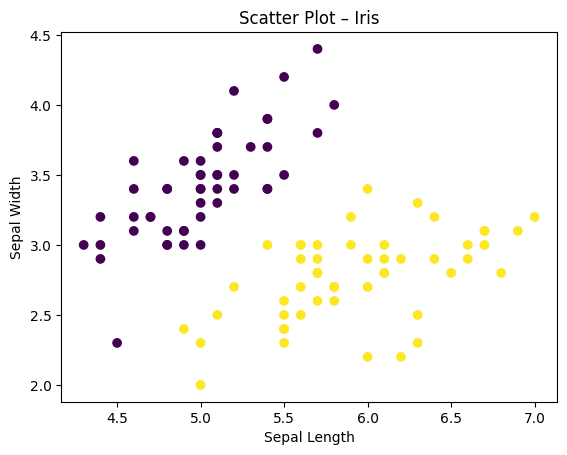

In [10]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot – Iris')
plt.show()

4.2 Feature Engineering

Se seleccionan las características más relevantes dependiendo del problema. En el caso de Iris, usaremos:

sepal length

sepal width

petal length

petal width

Estandarización:

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4.3 Model Training

División del dataset y entrenamiento:

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

4.4 Prediction

Función para predecir un patrón nuevo:

In [13]:
def predict_pattern(pattern):
    pattern_scaled = scaler.transform([pattern])
    pred = model.predict(pattern_scaled)
    return pred[0]

predict_pattern([5.1, 3.5, 1.4, 0.2])

np.int64(0)

4.5 Evaluación del Modelo

Accuracy

In [14]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

1.0

Matriz de Confusión

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0],
       [ 0,  8]])

Visualización:

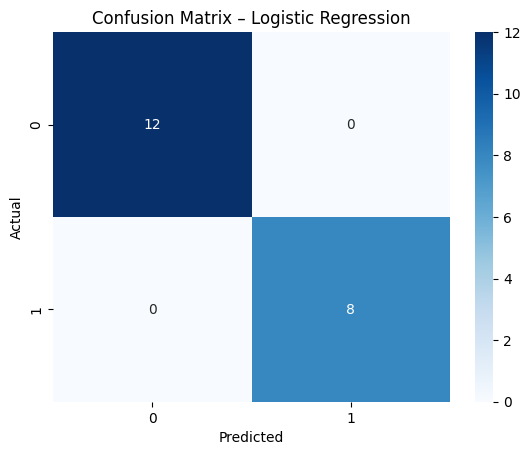

In [16]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Logistic Regression')
plt.show()

5. Referencias Bibliográficas

Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn and TensorFlow. O’Reilly Media.

Scikit-learn documentation: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression